

# Project: Investigate (noshowappointments-kagglev2-may-2016) Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



 in this project I will Investigate (noshowappointments-kagglev2-may-2016) dataset, this dataset contains data collected from    hundred thousand medical appointments in Brazil, and it focused on whether or not patients show up for his or her appointment. Each row include number of features about the patient and whether or not the patient show up for the appointment.
 
 Here are some explanations of some of the features in dataset :
- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital(the neighborhood where the hospital located on).
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- ‘No_show’ if it is ‘No’ the patient showed up to their appointment , and if it is ‘Yes’ they did not show up.
 
the qestions that I try to answer :   
   > **Q1** Who tends to not show up for the appointment (males or females)?<br>
   > **Q2** What is the percentage of appointments that the patient did not show up for it ?<br>
   > **Q3** Dose SMS reminder msg effect the number of the patient not show?<br>
   > **Q4** do the patients who did not enroll in the Brasilian welfare program are more likely to show up for the appointment?<br>
   > **Q5** are the patients who has Hypertension and Diabetes patients are more likely to show up ?



In [59]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 




<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### 1- Loud the data 

In [60]:
#loud the data 
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#show the first five lines of the dataset
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 2- Perform operations to inspect data types and look for instances of missing or possibly errant data loud the data 

In [61]:
# show the data type for each column 
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

the 'ScheduledDay' and 'AppointmentDay' column need to be in date-time format which make them easier to handle , also i will convert the 'No-show' to intger where NO=0 and Yes=1  this will help make the graphs more clear.

#### 3- show histograms for the features:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F5748BFC8>,
      dtype=object)

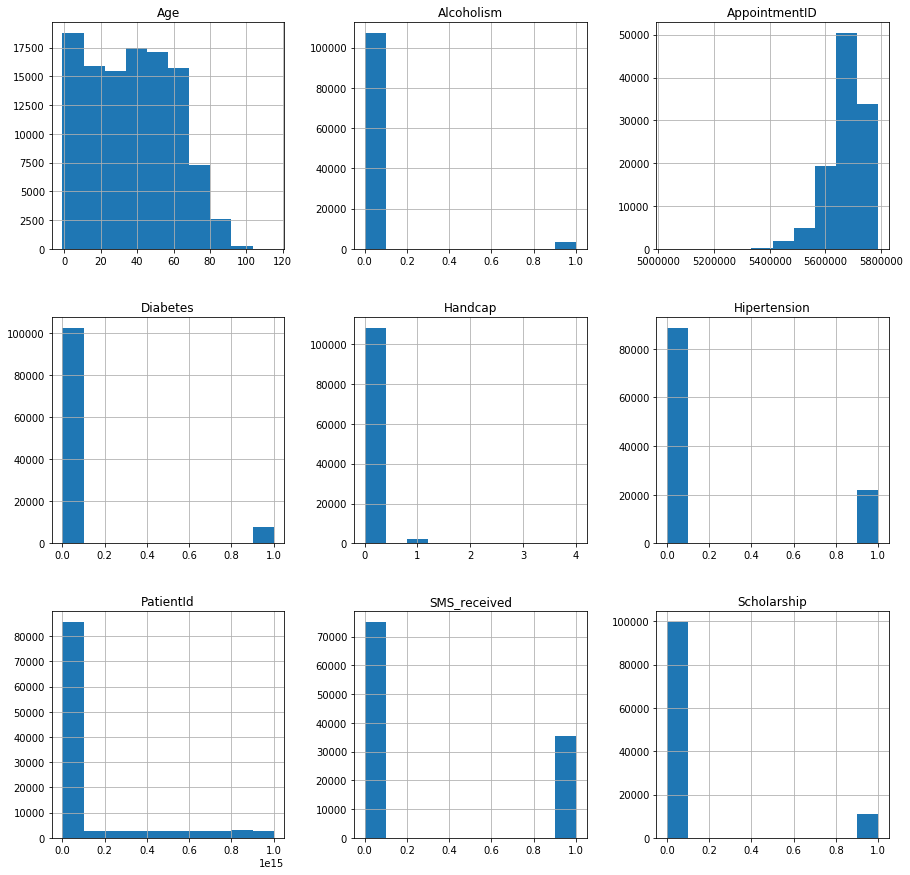

In [62]:
df.hist(figsize=(15,15))

histogram observations:
- Age : the number of young patients in the dataset is higher than the number of old patients.
- Scholarship: most patients are not enrolled in Brasilian welfare program.
- Hipertension: most patients do not suffer from hypertension
- Diabetes: most patients do not suffer from diabetes.
- Alcoholism: most patients are not alcoholism.
- Handcap: most patients are not handicap.
- SMS_received: the number of patients who receive SMS msg higher than the number of patient who do not.


In [63]:
# show a summary of the dataset 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


the output of "df.describe()" show that the minimum value of Age column is -1 which is Unrealistic value 

In [64]:
# show the number of null values 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [65]:
# show the number of duplicates
df.duplicated().sum()

0

as shown in above the dataset does not contain null and duplicated values 

### Data Cleaning 

1- fix the columns labels: 
- replace the - with _ 
- correct the Spelling errors

In [66]:
#replace the - with _
df.columns=df.columns.str.replace('-','_')
# rename the column with Spelling errors
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap'}, inplace=True)

2- convert the 'ScheduledDay' and 'AppointmentDay' to date time data type

In [67]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

3- convert ''No_show'' to integer

In [68]:
#create 2 dataframes 1 for 'No_show'= 'No' and the other for 'No_show'= 'Yes'
df_n= df[df['No_show']== 'No']
df_y= df[df['No_show']== 'Yes']

#change the values form 'No' to '0' and from 'yes' to '1'
df_n.No_show='0'
df_y.No_show='1'

#change the values in the original dataframe
df[df['No_show']== 'No']= df_n
df[df['No_show']== 'Yes']= df_y

#convert 'No_show' to int
df['No_show'] = df['No_show'].str.extract('(\d+)').astype(int)


C:\Users\Norh\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


4- make the values in the age column logical 

In [69]:
# show the number of rows contains 0 or less as value in 'Age' column
df[df['Age']<=0].count()

PatientId         3540
AppointmentID     3540
Gender            3540
ScheduledDay      3540
AppointmentDay    3540
Age               3540
Neighbourhood     3540
Scholarship       3540
Hypertension      3540
Diabetes          3540
Alcoholism        3540
Handicap          3540
SMS_received      3540
No_show           3540
dtype: int64

In [70]:
# since there are 3540 rows contain values <= 0 which is a great number 
# ,insted of dorping these rows it will be filled with the mean.

m_age = df['Age'].mean()

un_real_age= df.query('Age <= 0')
un_real_age.Age=m_age
df[df['Age']<=0]=un_real_age

#check number of rows contains 0 or less as value in 'Age' column 
df[df['Age']<=0]['Age'].count()

0

<a id='eda'></a>
## Exploratory Data Analysis


### Q1: Who tends to not show up for the appointment (males or females)?

In [71]:
#bar_plt function to help in bar plot creation
def bar_plt(number_of_bars, mean ,colors,locations,labels,xlabel,ylabel,title):
    
    #create bars
    for i in range(number_of_bars):
        f_bars = plt.bar(i , mean[i], color=colors[i])
        
    # xtick labels
    plt.xticks(locations, labels)
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    return 

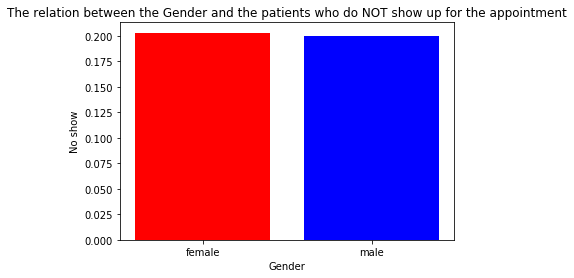

In [72]:
#Calculate the mean 
mean_gend= df.groupby(['Gender'])['No_show'].mean()

#initialize title
title=("The relation between the Gender and the patients who do NOT show up for the appointment")

#call bar_plt function to create the graph
bar_plt(2, mean_gend ,['r','b'],[0,1],['female','male'],"Gender","No show",title)



as shown in the grap above there is nearly no difference between the genders .

###  Q2:What is the percentage of appointments that the patient did not show up for it ?<br>

Text(0.5, 1.0, 'Does patient show up for appointment?')

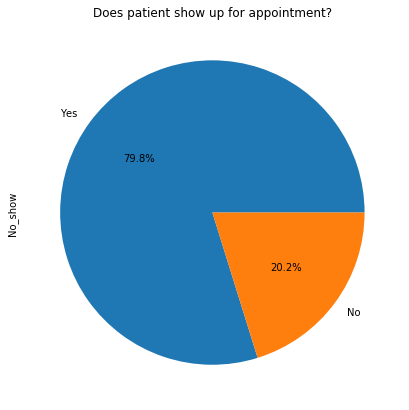

In [73]:
no_show_p= df.groupby('No_show')['No_show'].count()

#change the graph size
fig = plt.figure(figsize=(7,7))

#change the labels to yes and no insted of 0 and 1
no_show_p.plot.pie(autopct='%.1f%%',labels=['Yes','No'])

plt.title('Does patient show up for appointment?')



as shown in the graph the percentage of patients who do not show up for the appointment is 20.2%, whereas the  percentage of patients who show up 79.8% .

###  Q3: dose SMS reminder msg effect the number of the patient not show?

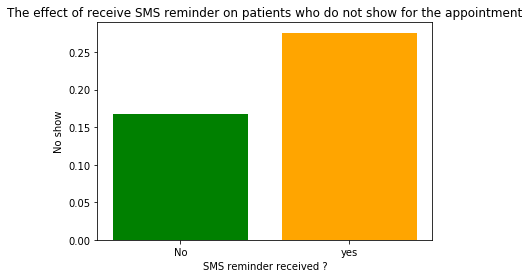

In [74]:
sms_mean= df.groupby(['SMS_received'])['No_show'].mean()

#initialize title
title=("The effect of receive SMS reminder on patients who do not show for the appointment")

#call bar_plt function to create the graph
bar_plt(2, sms_mean ,['g','orange'],[0,1],['No','yes'],"SMS reminder received ?","No show",title)




the graph shows that the number of patients who do not show for the appointment while the receive an SMS reminder is higher than the number of patients who do not show and did not receive an SMS reminder which is surprising 

### Q4:  do the patients who did not enroll in the Brasilian welfare program are more likely to show up for the appointment?

Text(0.5, 1.0, 'do patients who NOT BE enrolled in scholarship show up for appointment ?')

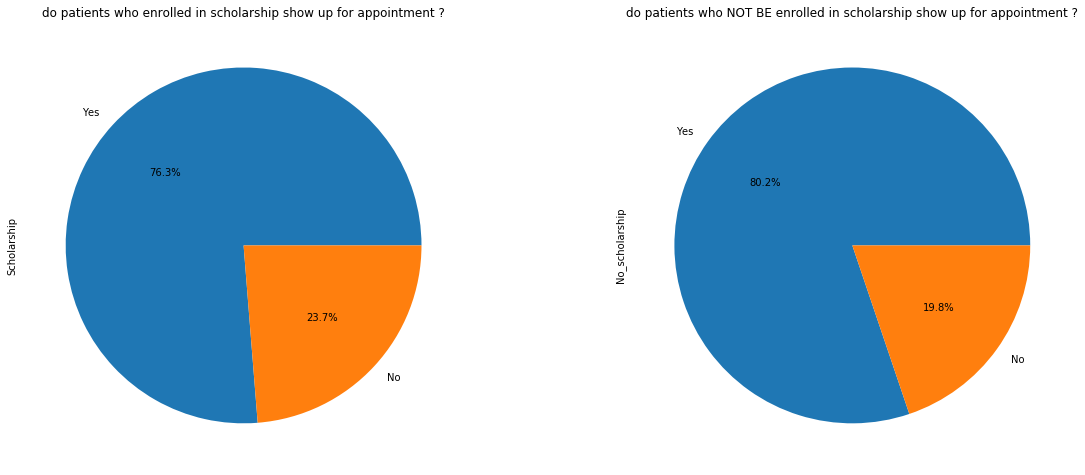

In [75]:
in_scholarship =df.query('Scholarship == 1')
no_scholarship =df.query('Scholarship == 0')



in_scholarship =in_scholarship.groupby('No_show').count()['Scholarship']
no_scholarship=no_scholarship.groupby('No_show').count()['Scholarship']


fig = plt.figure(figsize=(20,18))

#first plot
plt.subplot(2,2,1)
#change the labels to yes and no insted of 0 and 1
in_scholarship.plot.pie(autopct='%.1f%%',labels=['Yes','No'])
plt.title('do patients who enrolled in scholarship show up for appointment ?')

#second plot 
plt.subplot(2,2,2)
#change the labels to yes and no insted of 0 and 1
no_scholarship.plot.pie(autopct='%.1f%%',labels=['Yes','No'])
plt.ylabel('No_scholarship')
plt.title('do patients who NOT BE enrolled in scholarship show up for appointment ?')


as shown in the graph the patient who did not enroll in the Brasilian welfare program are more likely to show up with percentage of 80.2%

### Q5 : are the patients who has Hypertension and Diabetes patients are more likely to show up ?

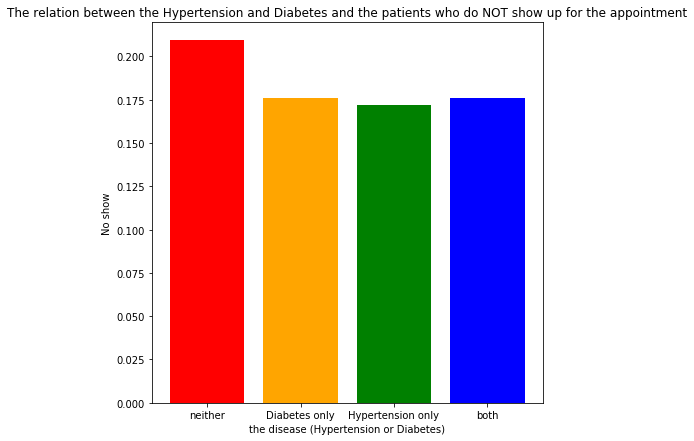

In [76]:
#Calculate the mean 
mean_2d= df.groupby(['Hypertension','Diabetes'])['No_show'].mean()

#initialize title and labels
title= ("The relation between the Hypertension and Diabetes and the patients who do NOT show up for the appointment")
labels=['neither','Diabetes only','Hypertension only','both']

#change the size of plot
fig = plt.figure(figsize=(7,7))

#call bar_plt function to create the graph
bar_plt(4, mean_2d ,['r','orange','g','b'],[0,1,2,3],labels,"the disease (Hypertension or Diabetes)","No show",title)


the graph show that the patient who has both Hypertension and Diabetes are more likely to show up than the patient who has neither .

## Conclusions



- the gender does not indicate whether the patient shows up for the appointment or not.
- the patients show up for the appointments are 79.8%, whereas patients did not show up for the appointments are 20.2% so the patients are more likely to show up for the appointment.
- the number of patients who receive SMS msg reminder and did not show up for the appointment is higher than the number of patients who did NOT receive an SMS msg reminder and did not show up for the appointment.
- the percentage of patients who enrolled in the Brasilian welfare program and did not show up is higher than the percentage of patients who did not enroll and did not show up.
- the patients who did not enroll in the Brasilian welfare program are more likely to show up for the appointment.
- the patients who have both Hypertension and Diabetes are more likely to show up than the patient who has neither.
- the patients who have Hypertension only are more likely to show up than the patients who have Diabetes only. 

### Limitations:
- We cannot generalize these results of analsis to the world because they are intended for patients in Brazil only.
- there is unrealistic data in the dataset such as Age=-1 


Norah alshammari -2020